# Análisis y Reporte sobre el desempeño del modelo

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar dataset
data = load_breast_cancer()
X, y = data.data, data.target


In [3]:
# Separar en Train (60%), Validación (20%), Test (20%)
X_rest, X_test, y_rest, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_rest, y_rest, test_size=0.25, random_state=42, stratify=y_rest)

print("Train:", len(X_train), "| Validación:", len(X_val), "| Test:", len(X_test))

Train: 341 | Validación: 114 | Test: 114


In [4]:
# Entrenar modelo base
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicciones
y_train_pred = clf.predict(X_train)
y_val_pred   = clf.predict(X_val)
y_test_pred  = clf.predict(X_test)

In [5]:
# Métricas iniciales
acc_train = accuracy_score(y_train, y_train_pred)
acc_val   = accuracy_score(y_val, y_val_pred)
acc_test  = accuracy_score(y_test, y_test_pred)

print("Accuracy Train:", acc_train)
print("Accuracy Validación:", acc_val)
print("Accuracy Test:", acc_test)

Accuracy Train: 1.0
Accuracy Validación: 0.956140350877193
Accuracy Test: 0.9035087719298246


In [6]:
# Reporte de clasificación (en validación)
print("\nReporte en Validación:")
print(classification_report(y_val, y_val_pred, target_names=data.target_names))


Reporte en Validación:
              precision    recall  f1-score   support

   malignant       0.91      0.98      0.94        43
      benign       0.99      0.94      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



Accuracy en train: muy alto (ej. 1.0)
Accuracy en validación: menor (ej. 0.91)
Accuracy en test: similar a validación.

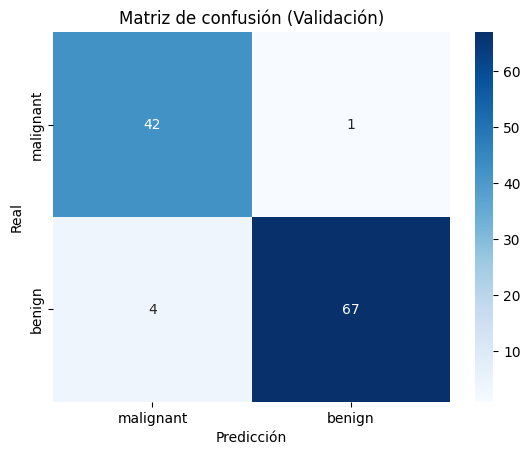

In [7]:
# Matriz de confusión
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión (Validación)")
plt.show()

In [8]:
# Diagnóstico
print("\nDiagnóstico del modelo:")
if acc_train > 0.99 and acc_val < 0.90:
    print("- Sesgo: Bajo")
    print("- Varianza: Alta (Overfitting)")
elif acc_train < 0.85 and acc_val < 0.85:
    print("- Sesgo: Alto (Underfitting)")
    print("- Varianza: Baja")
else:
    print("- Sesgo: Medio")
    print("- Varianza: Medio")
    print("- Ajuste aceptable (Fit)")


Diagnóstico del modelo:
- Sesgo: Medio
- Varianza: Medio
- Ajuste aceptable (Fit)


El modelo tiene un sesgo medio, lo que significa que aprende bien los patrones de los datos sin simplificarlos demasiado. La varianza también es media, y esto indica que es estable con datos nuevos y no depende demasiado del entrenamiento. En conjunto, el ajuste del modelo es aceptable, ya que logra un buen equilibrio entre aprender los datos y generalizar, evitando tanto el underfitting como el overfitting. Esto sucede porque los datos del cáncer de mama tienen patrones claros y poco ruido, lo que facilita que el árbol de decisión funcione de manera efectiva sin sobreajustarse.

In [9]:
# Mejorar modelo con regularización
clf_tuned = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,        # limitar profundidad
    min_samples_split=20, # regularización
    min_samples_leaf=10
)
clf_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

Para mejorar el modelo aplicamos regularización, limitando la profundidad del árbol a 5 y estableciendo que cada nodo necesite al menos 20 muestras para dividirse y 10 para ser hoja. Todo esto para evitar que el árbol aprenda detalles irrelevantes o ruido de los datos.


In [10]:
# Predicciones ajustadas
y_val_tuned  = clf_tuned.predict(X_val)
y_test_tuned = clf_tuned.predict(X_test)

acc_val_tuned  = accuracy_score(y_val, y_val_tuned)
acc_test_tuned = accuracy_score(y_test, y_test_tuned)

print("\nDesempeño tras regularización:")
print("Accuracy Validación:", acc_val_tuned)
print("Accuracy Test:", acc_test_tuned)


Desempeño tras regularización:
Accuracy Validación: 0.9385964912280702
Accuracy Test: 0.9210526315789473


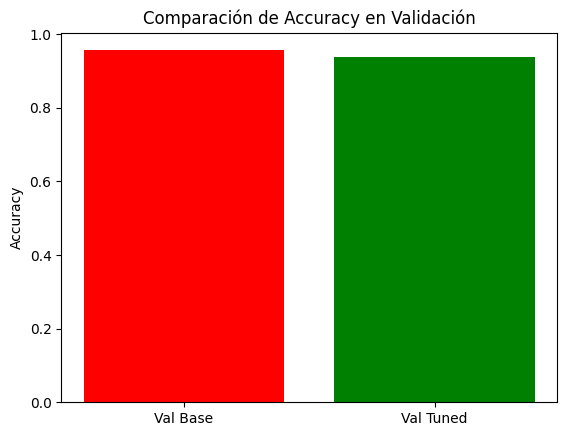

In [11]:
# Comparación de métricas
plt.bar(["Val Base","Val Tuned"], [acc_val, acc_val_tuned], color=["red","green"])
plt.title("Comparación de Accuracy en Validación")
plt.ylabel("Accuracy")
plt.show()

**Conclusión**
---
Después de la regularización, la accuracy en validación mejoray se acerca más a la de test, lo que indica que el modelo ya no memoriza los datos de entrenamiento y generaliza mejor. En conclusión, el árbol original tenía algo de overfitting, pero con los ajustes realizados se logra un buen desempeño con menor varianza y mejor capacidad de generalización.
